# Lecture 15.
- timeseries.
- statistics.

The concept of time is essential in finance. Key financial calculations, like the present value and the future value, depend on the length of time that we expect an asset to be held. Additionally, we evaluate financial portfolios over periods of time to determine whether to consider them successful investments. Therefore, when we analyze financial data—whether stocks, bonds, or cryptocurrency—we’re doing an analysis that involves time.

A time series analysis involves analyzing data over an ordered sequence of time periods that are equally spaced. Generally, these periods consist of a combination of days, quarters, or years. However, a time series analysis can involve smaller periods, such as minutes or, if you're a trader in today's markets, microseconds.

In this lesson, you’ll explore a case study of a time series analysis that focuses on cryptocurrency markets—specifically, those for Bitcoin. You’ll collect, prepare, and analyze Bitcoin data by using the Pandas functions you learned in this module. As is usually the case with financial analysis, the goal of this time series analysis is to identify viable investment opportunities.

The analysis will involve comparing two datasets: bitcoin_1 and bitcoin_2. Each dataset contains pricing information for the same Bitcoin asset at the same time but on two different exchanges. (Let’s say that again: same asset, same time, different exchanges.)




# Reading date and time data

When working with date and time data, we need to include the following parameters when reading the CSV file into the Pandas DataFrame:

`index_col`

`parse_dates`

`infer_datetime_format`

In [2]:
# Collect the data for the bitcoin_1.csv CSV file
path_csv = Path('../Resources/bitcoin_1.csv')
bitcoin_1 = pd.read_csv(
    path_csv,
    
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True

)

# View the DataFrame
bitcoin_1.head()

NameError: name 'pd' is not defined

# Let us look at the notebooks

## Notebook 1
https://courses.bootcampspot.com/courses/800/files/677042/download


Looking more closely at the Timestamp index, we can see that it supplies the date, hour, minute, and second of the trade time. Gathering pricing data down to the minute, and even to the second, explains why datasets take so long to import—they’re large!


## Notebook 2
same story


# Prepare the Bitcoin Data

We’ve created the two Bitcoin DataFrames, so the next step is to prepare the data for analysis. Specifically, we need to identify any missing or duplicated values and to check for characters that we need to remove, like currency symbols, before we can do any calculations.


## Handle Missing Values
As you learned previously, having many missing, or null, values in a dataset can skew any financial analysis. We’ll use the `isnull` function along with the `sum` and `mean` functions to determine the total percentage of null values for each DataFrame.

If you did find null values, you’d use either the `dropna` function to remove them or the `fillna `function to replace them with values like `0, “Unknown”, or the mean.`

plus the other ones we talked about like `mode` and using methods like `ffill` or `bfill`

Because we don’t have any null values to handle, we’ll move on to checking for duplicates.

## Finding missing data.

## handling missing data. 1] fill 2] drop

## handle duplicate data.

## handle symbols & data type.

## Handle Duplicated Values.

In a time series analysis, duplicated values can prove challenging. Our Bitcoin datasets present a case in point. When we call the duplicated function on either dataset, we get many True values, as the following image shows:

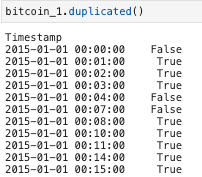

But, are any of these really duplicated entries? The answer is most likely no.


When it comes to time and prices, it’s virtually impossible to find a duplicated value. Why? Well, in the case of the Bitcoin DataFrames, the Timestamp index displays the times down to the second that the trades occurred. It’s entirely possible that either Bitcoin will trade at the same price over consecutive minutes. It’s even possible, although less likely, that a stock’s daily closing price will exactly match on consecutive days or on multiple days over a certain time period.

The bottom line is that even though it’s a best practice to check for duplicated values in a dataset, doing so might not prove helpful for a time series analysis or for asset pricing.

Null values, check. Duplicates, check. That just leaves symbols and data types for us to address.

# Handle Dollar Signs and Data Types
At a glance, the Close column in each DataFrame seems to indicate that no currency symbols exist that we need to worry about. The following image suggests this by showing the first five rows of both DataFrames:

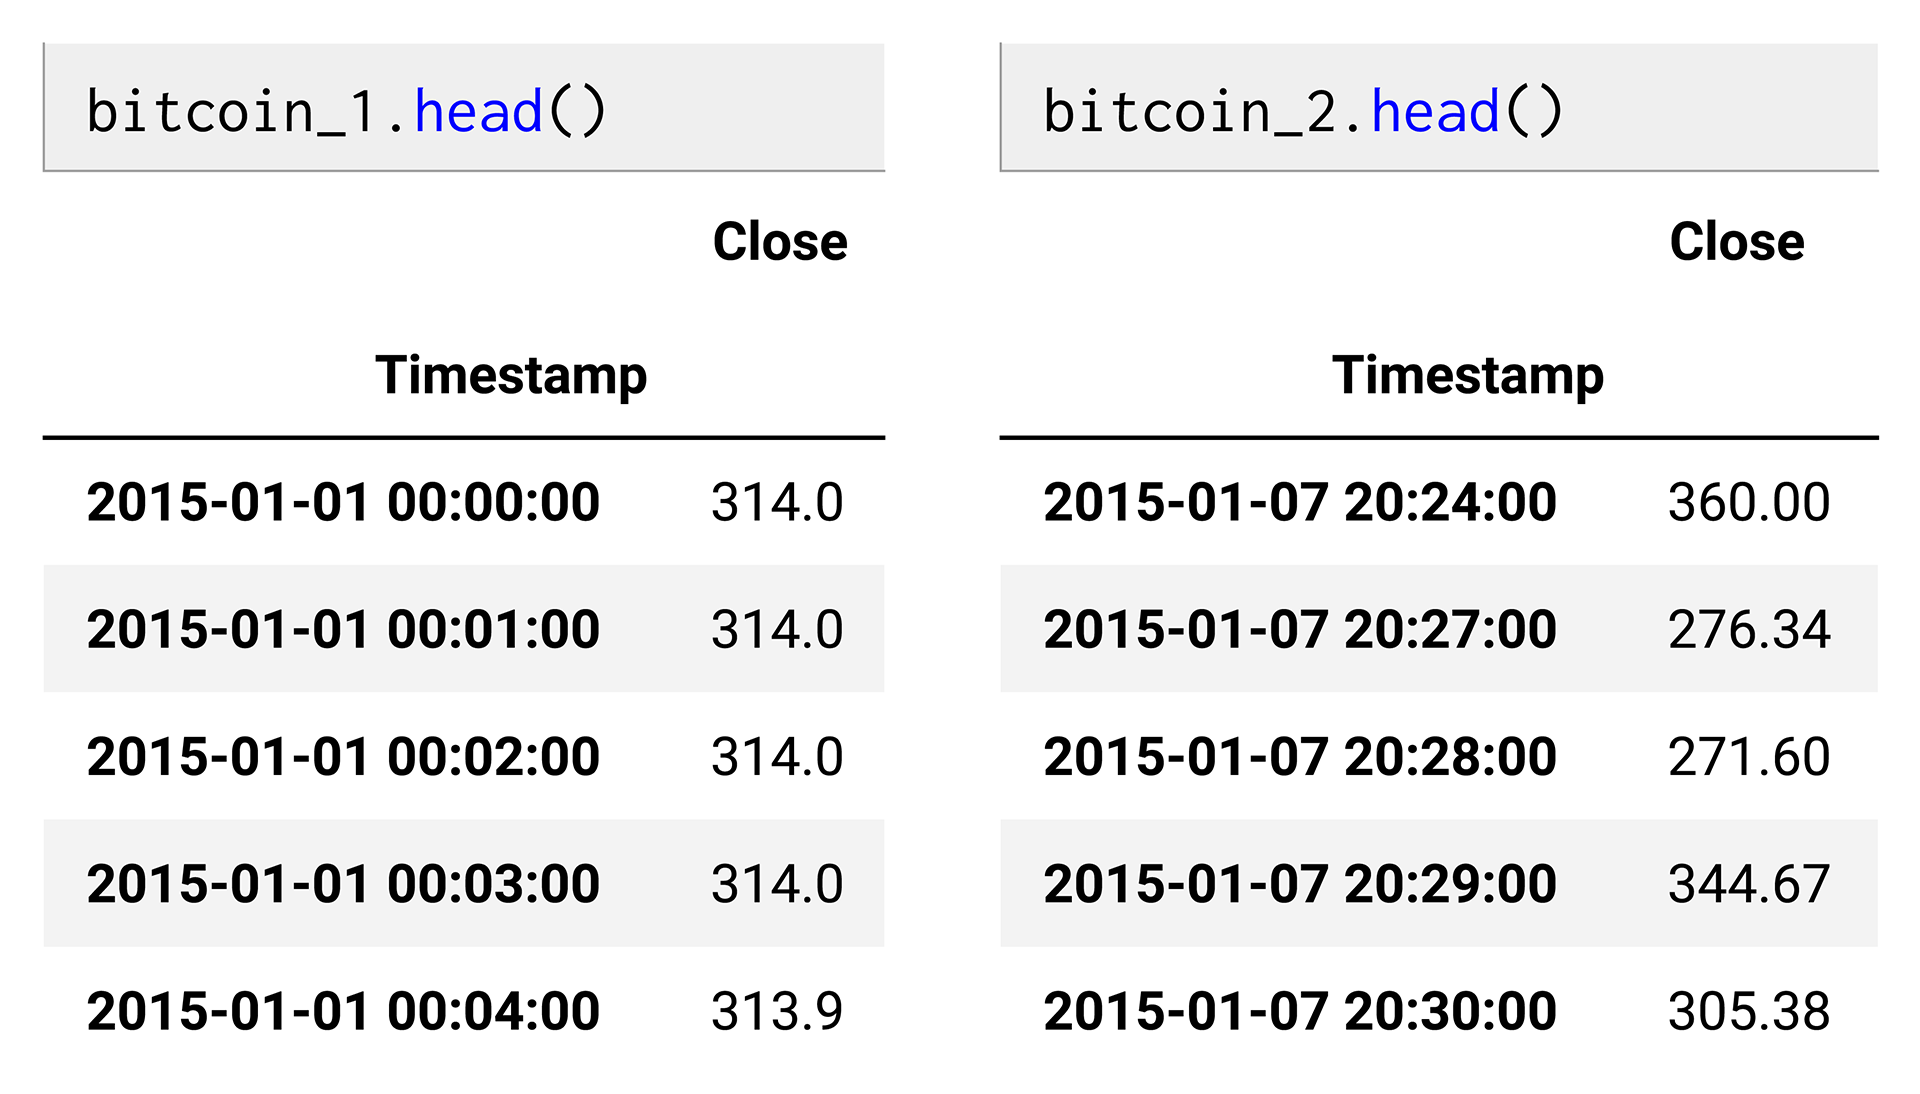

Still, it’s a best practice to confirm this.

One way to do so is to call the dtypes function on the columns that we’ll use for calculations. If the call results in a data type of `int` or `float`, we’re in the clear.

bitcoin_1['Close'].dtypes

# Analysis

As you learned in the previous lesson, data analysis happens in two parts. The first part involves understanding the big picture about the data. The second part involves a more nuanced and focused analysis of particular sections of the data. We’re about to dive into our analysis of Bitcoin data, so we’ll start by viewing the data through a wide lens.

# Describe the Data
The first step in getting our big picture of the Bitcoin data is to generate summary statistics by using the `describe` function.

The Pandas describe function generates summary statistics for a DataFrame. With these statistics, you can gain insight into each DataFrame and compare DataFrames.



# Analyze the Bitcoin Data via Plot Visualizations
The Pandas plot function quickly and efficiently creates data visualizations. With these visualizations, you as the analyst can identify patterns, trends, and the distribution of the data—all of which are important when performing an analysis.

First, we plot the data in the bitcoin_1 DataFrame by using the following code:

In [ ]:
bitcoin_1.plot(figsize=(10, 5), title="Bitcoin 1", color="blue")

Wait a minute—notice that we added parameters: figsize, title, and color. The plot function (Links to an external site.) offers numerous parameters that you can use to enhance your visualizations. Here are the three that we’re using:

- The `figsize` (width, height) parameter defines the size of the visualization.

- The `title` parameter adds a title above the visualization.

- The `color` parameter sets the color for the plot, which is particularly important when we plot multiple datasets in the same visualization.

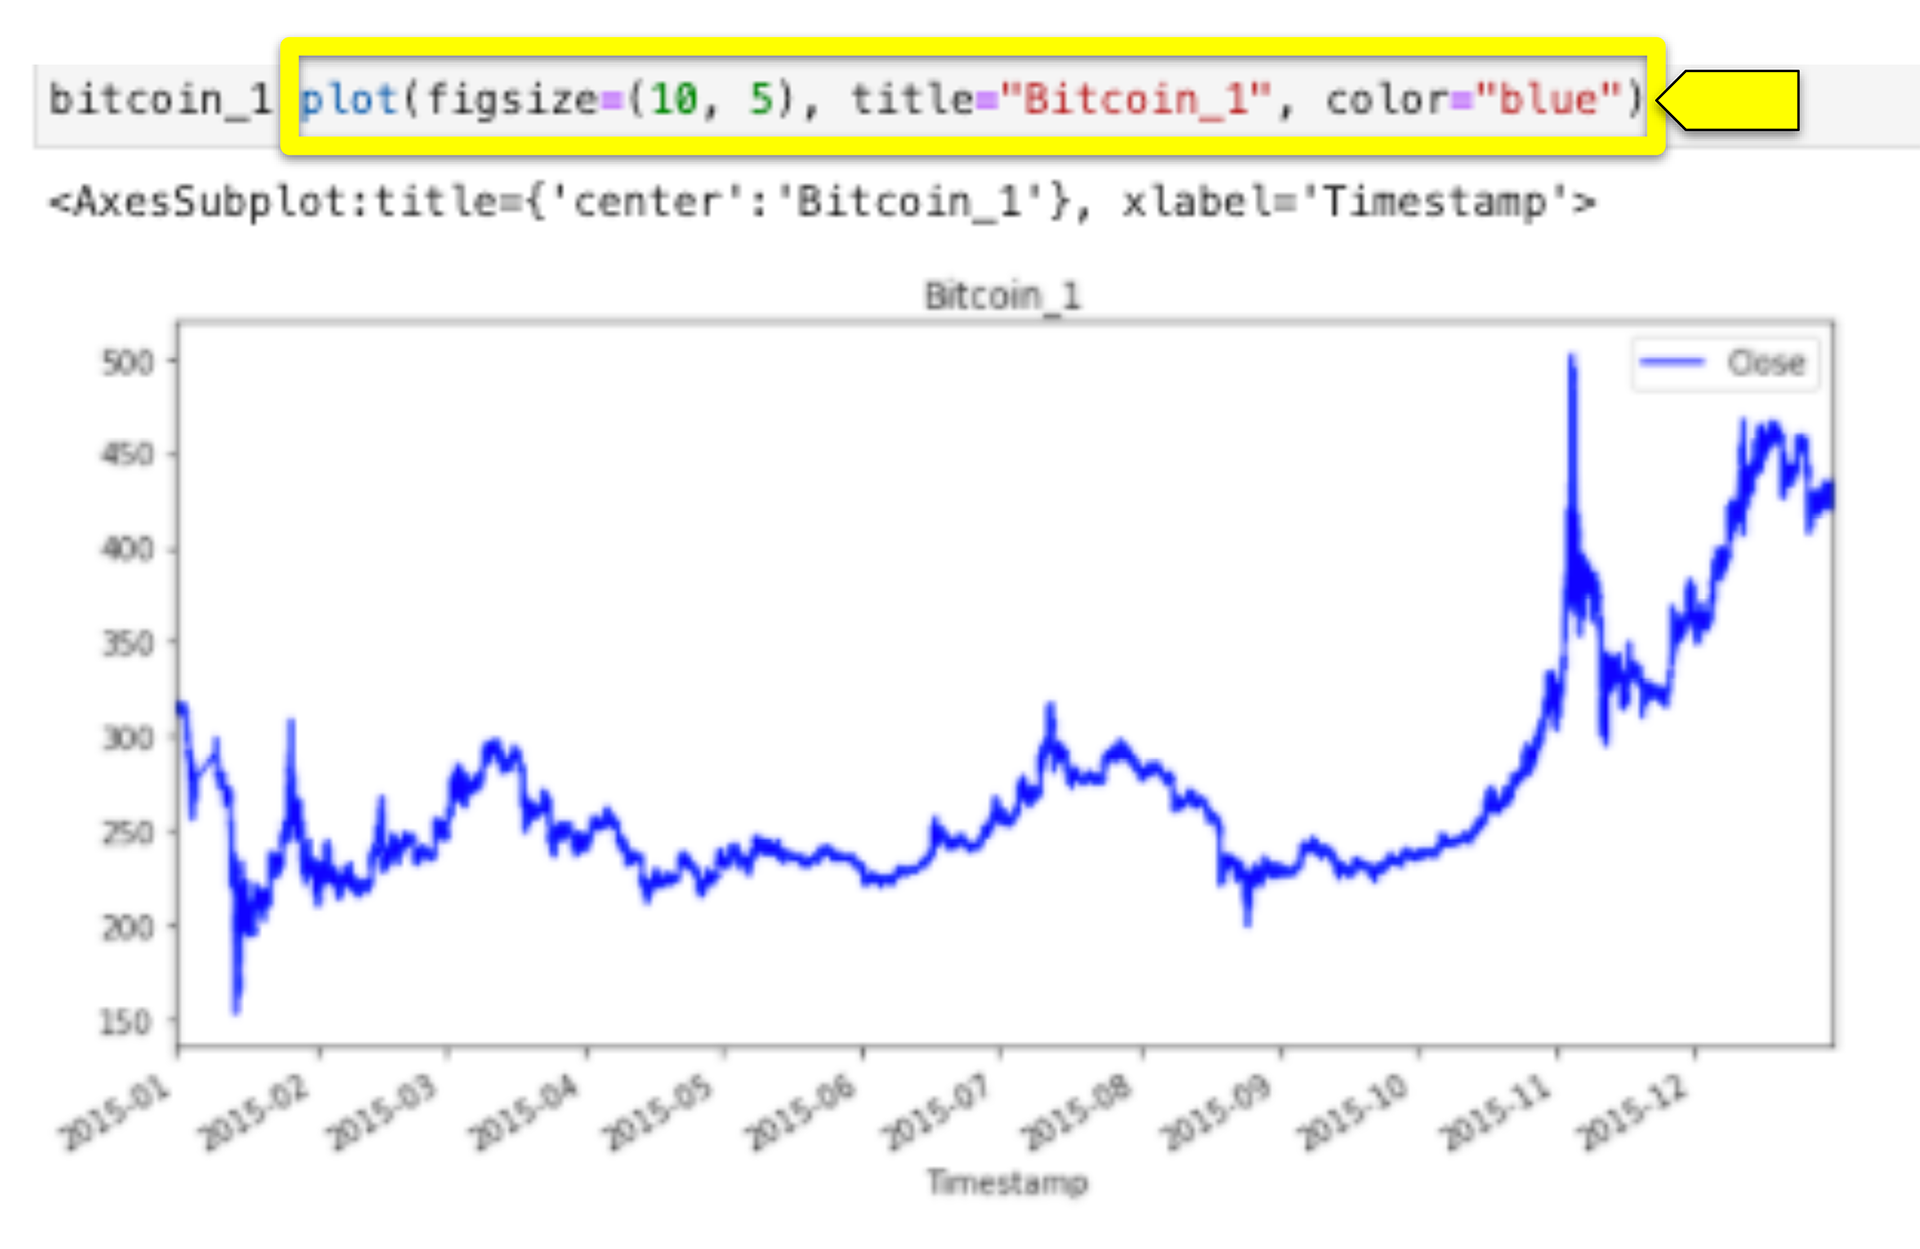

# Practice
https://courses.bootcampspot.com/courses/800/pages/3-dot-4-8-activity-plot-bitcoin-2?module_item_id=234973

# Overlay Plots
We can overlay the visualizations on the same plot—that is, display one plot on the top of the other. Then we can likely find smaller differences in price movements and maybe even specific dates to focus our analysis on.

To code the overlay, we plot the Close column for each dataset, adding the `legend` parameter to label each line in the plot, as the following code shows:


In [ ]:
bitcoin_1['Close'].plot(legend=True, figsize=(15, 7), title="Bitcoin_1 v. Bitcoin_2", color="blue", label="BTC 1")
bitcoin_2['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="BTC 2")
  

The resulting plot shows the times (in fact, the exact same times) with small price differences between the two exchanges. The places on the plot where we can see both the blue and the orange lines indicate the differences. The following image shows the overlaid plot:

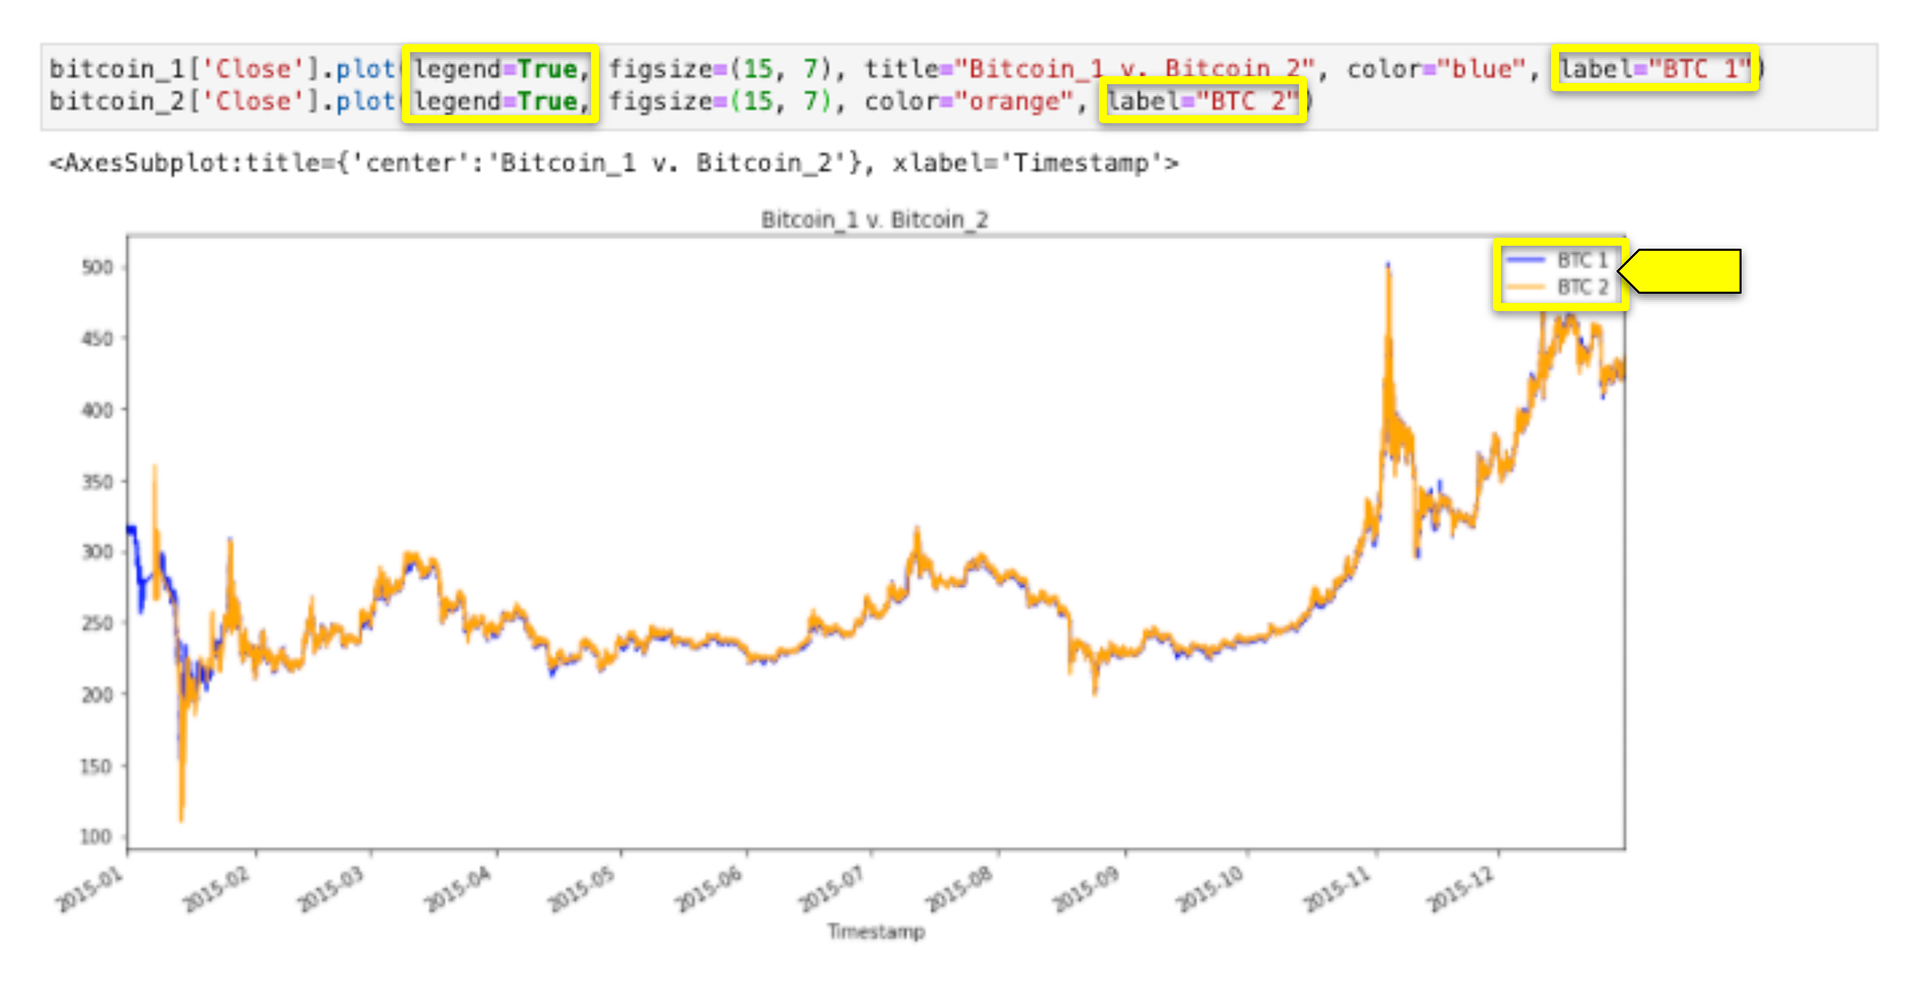

# Analyze the Bitcoin Data via Areas of Interest
As we determined in the last section, the overlay plot of the two DataFrames—and seeing the blue and the orange lines together—indicates that times existed when the same asset traded at two prices. The following image shows that plot:

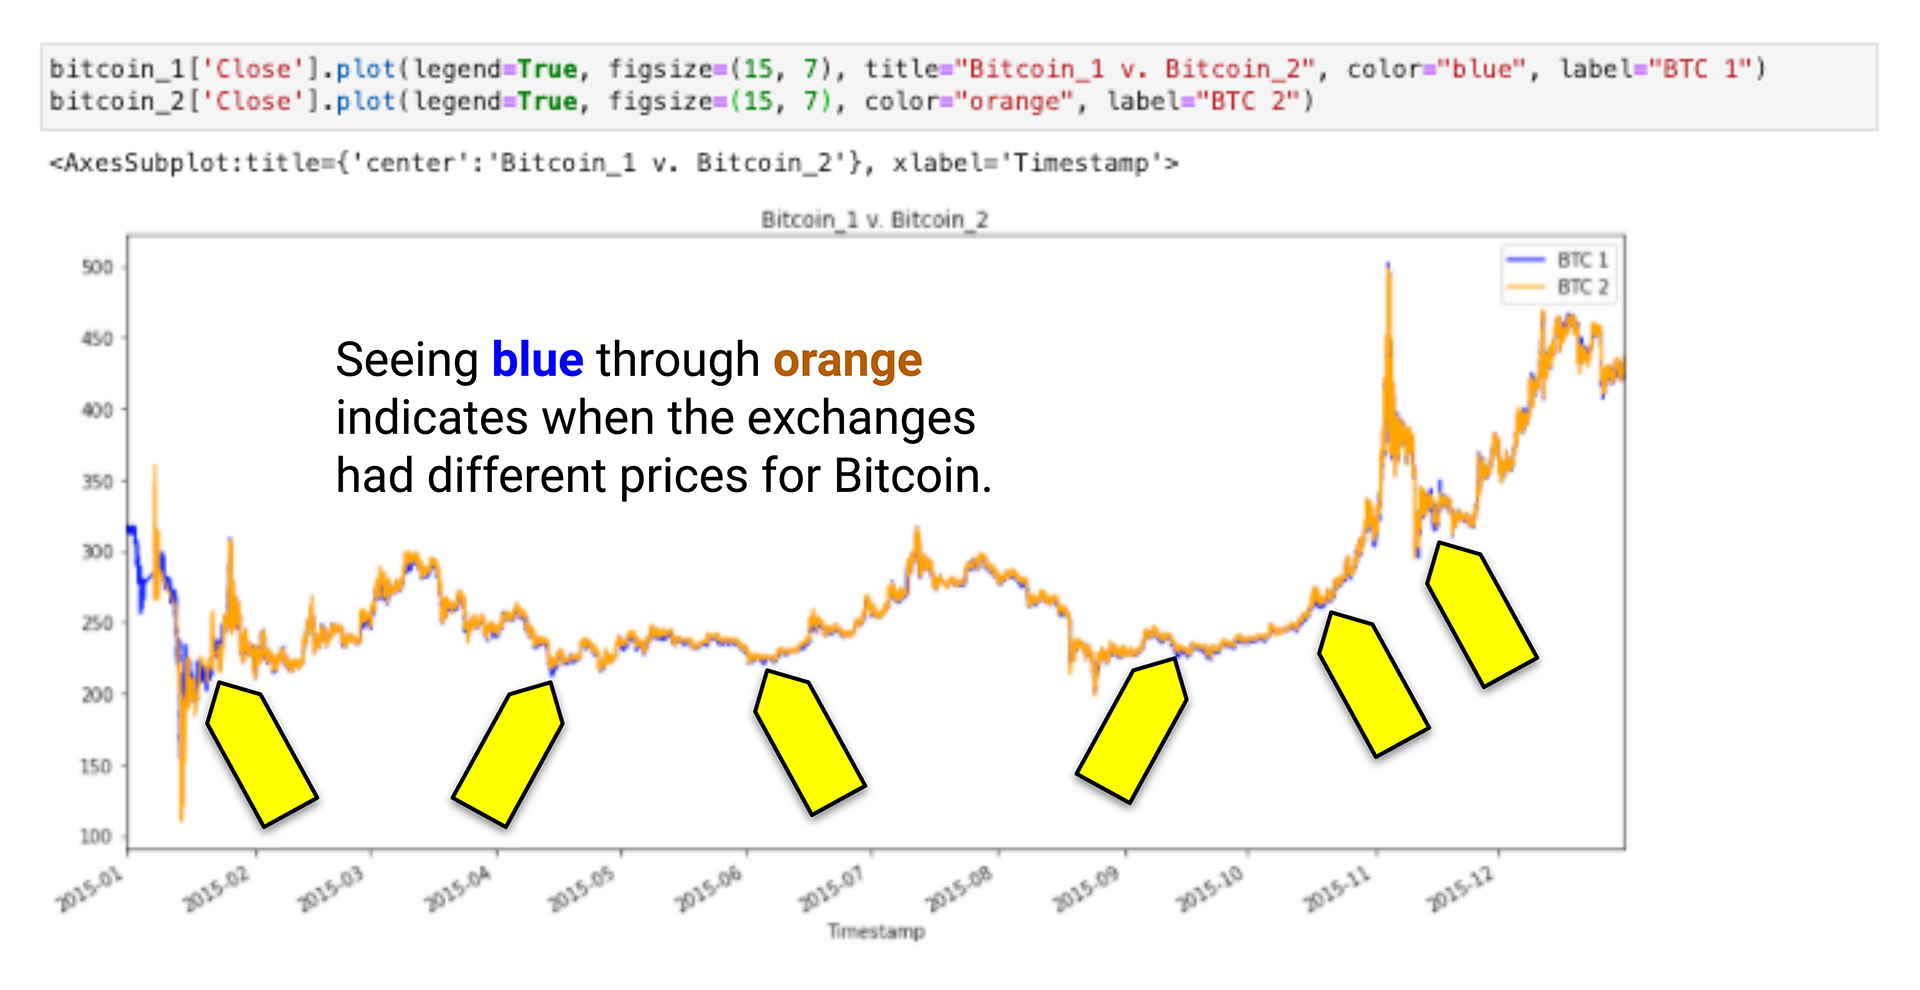

We should explore this anomaly by looking at the data for a single month, week, or even day rather than for the full year. This way, we can more easily observe the spread, or difference, between the two prices over shorter time periods. The loc function will help us do that.

# Get a Close-Up of the Data
We can visualize the Bitcoin data from the last week of January 2015 simply by changing the syntax of the overlay plot. The following code snippet uses the loc function to specify the dates we want to focus on:



In [ ]:
df['close'].loc['2015-01-26':'2015-01-31']

In [ ]:
bitcoin_1['Close'].loc['2015-01-26' : '2015-01-31'].plot(
    legend=True, figsize=(15, 10), title="January 2015", color="blue", label="BTC 1")
bitcoin_2['Close'].loc['2015-01-26' : '2015-01-31'].plot(
    legend=True, figsize=(15, 10), color="orange", label="BTC 2")

The following image shows the resulting plot:
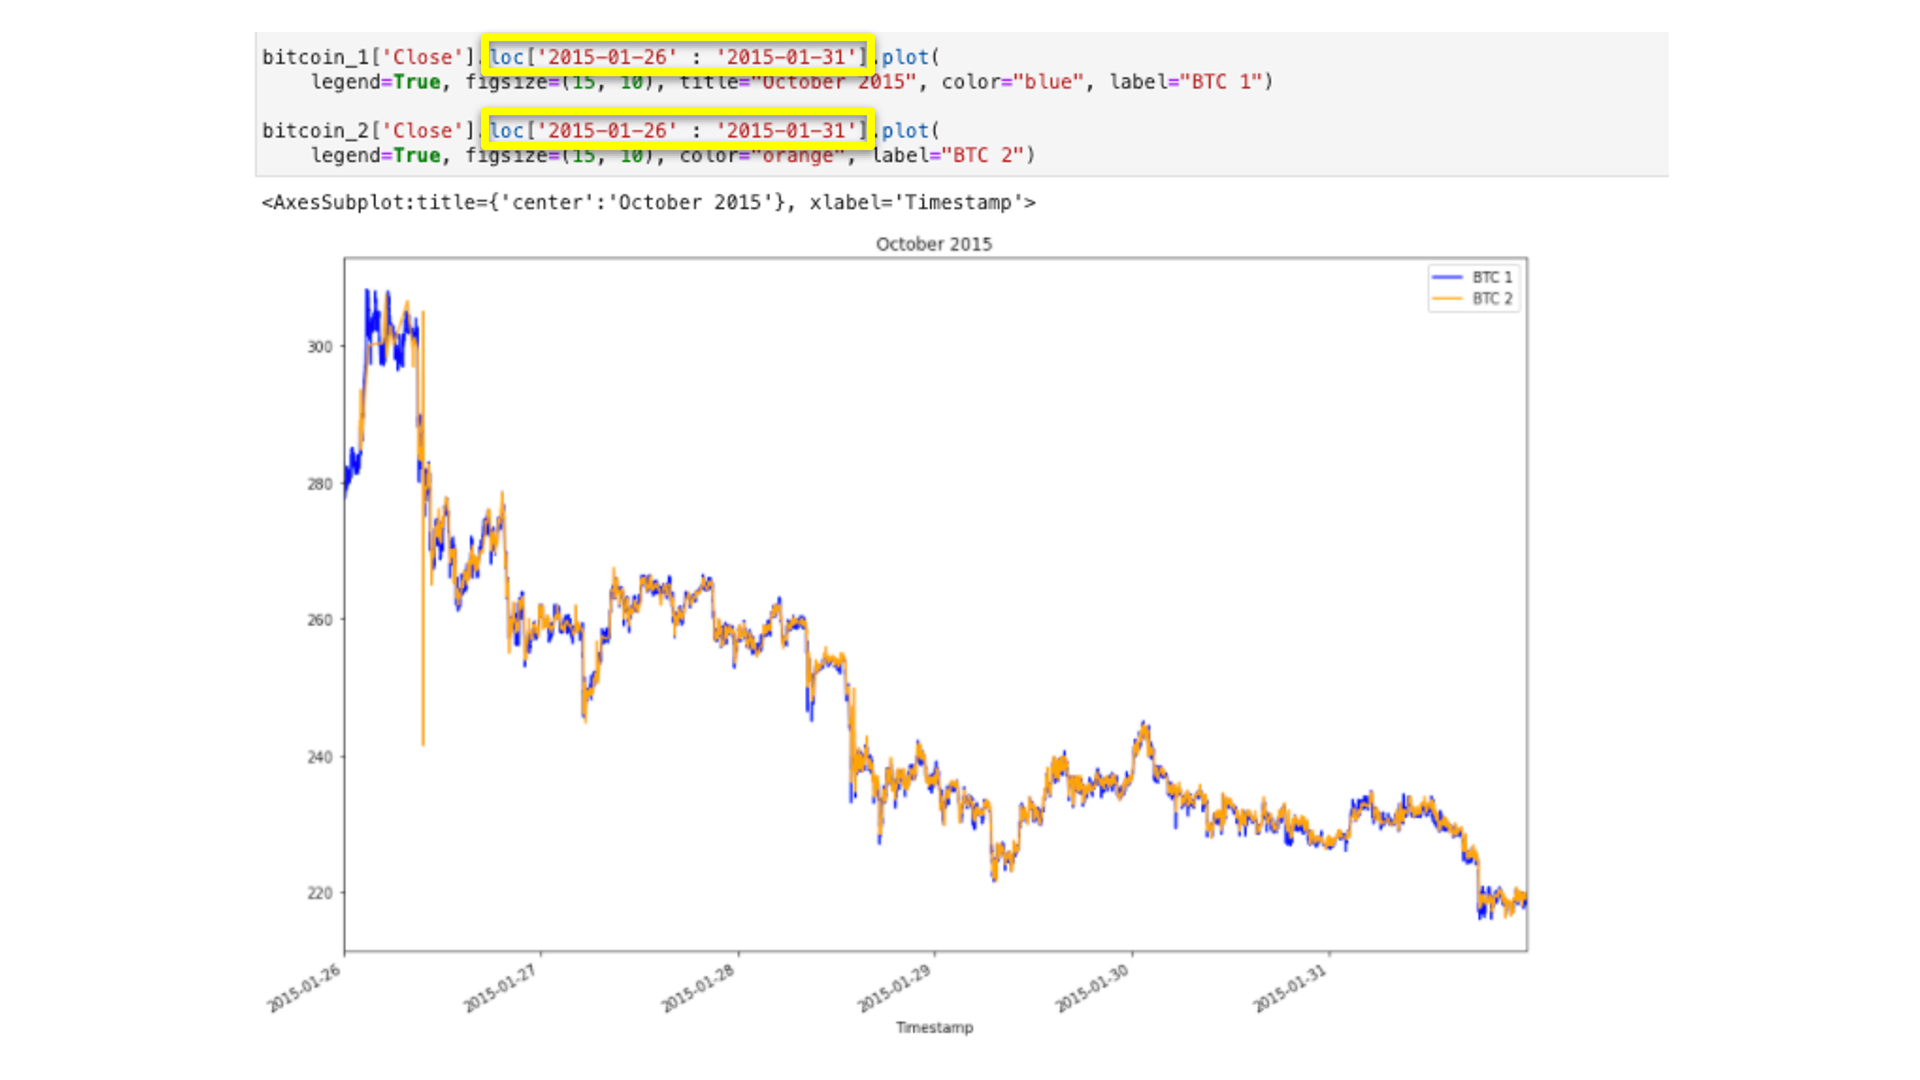

Notice two new parameters for the plots: legend and label. These parameters work together and allow us to clearly identify each line on the plot.

We can keep zooming in further on specific areas of interest, which will make the differences in price more apparent. For example, the following image shows the plotted data just for January 31, 2015:
    
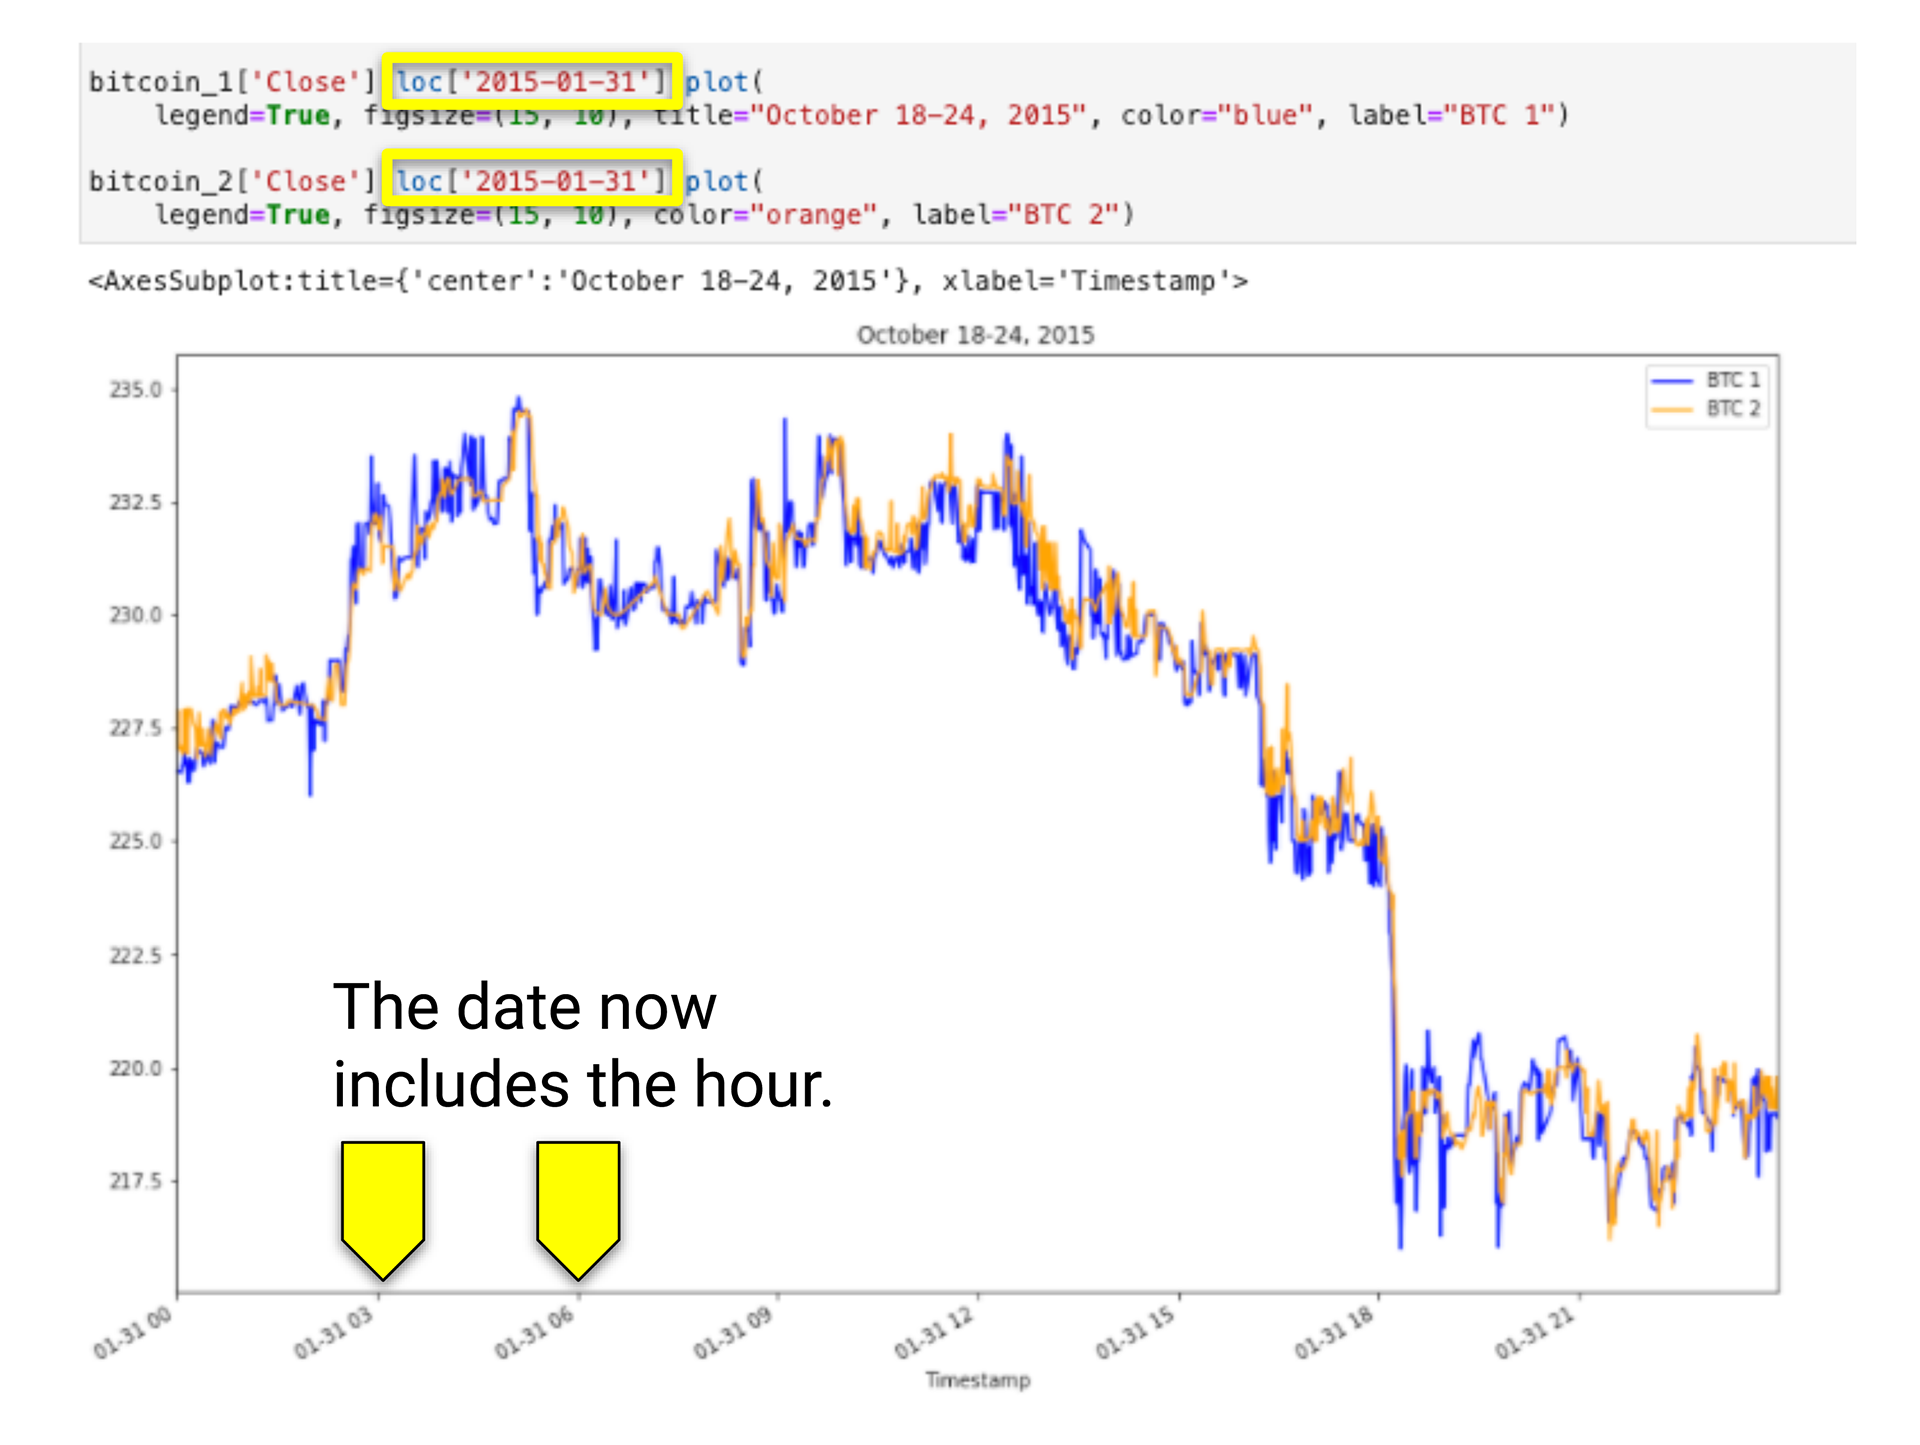

# Arbitrage Analysis

Arbitrage is the almost-simultaneous purchase and sale of an asset to profit from a difference in the asset's price between markets.

For example, say that one ton of copper is $5,000 in Chile but $10,000 in Taiwan and that it costs $1,000 to ship. You can take advantage of this opportunity by buying up copper in Chile and selling it in Taiwan. Copper is the same the world over, so when it’s cheap in one place and more expensive in another, it’s easy to profit.

Capitalizing on arbitrage opportunities can be exceedingly profitable, but it’s also rare, as you'll see. Identifying arbitrage opportunities in real time requires the careful analysis of time series data from multiple exchanges—and the ability to quickly react to constantly changing prices.


# Spread of Arbitrage

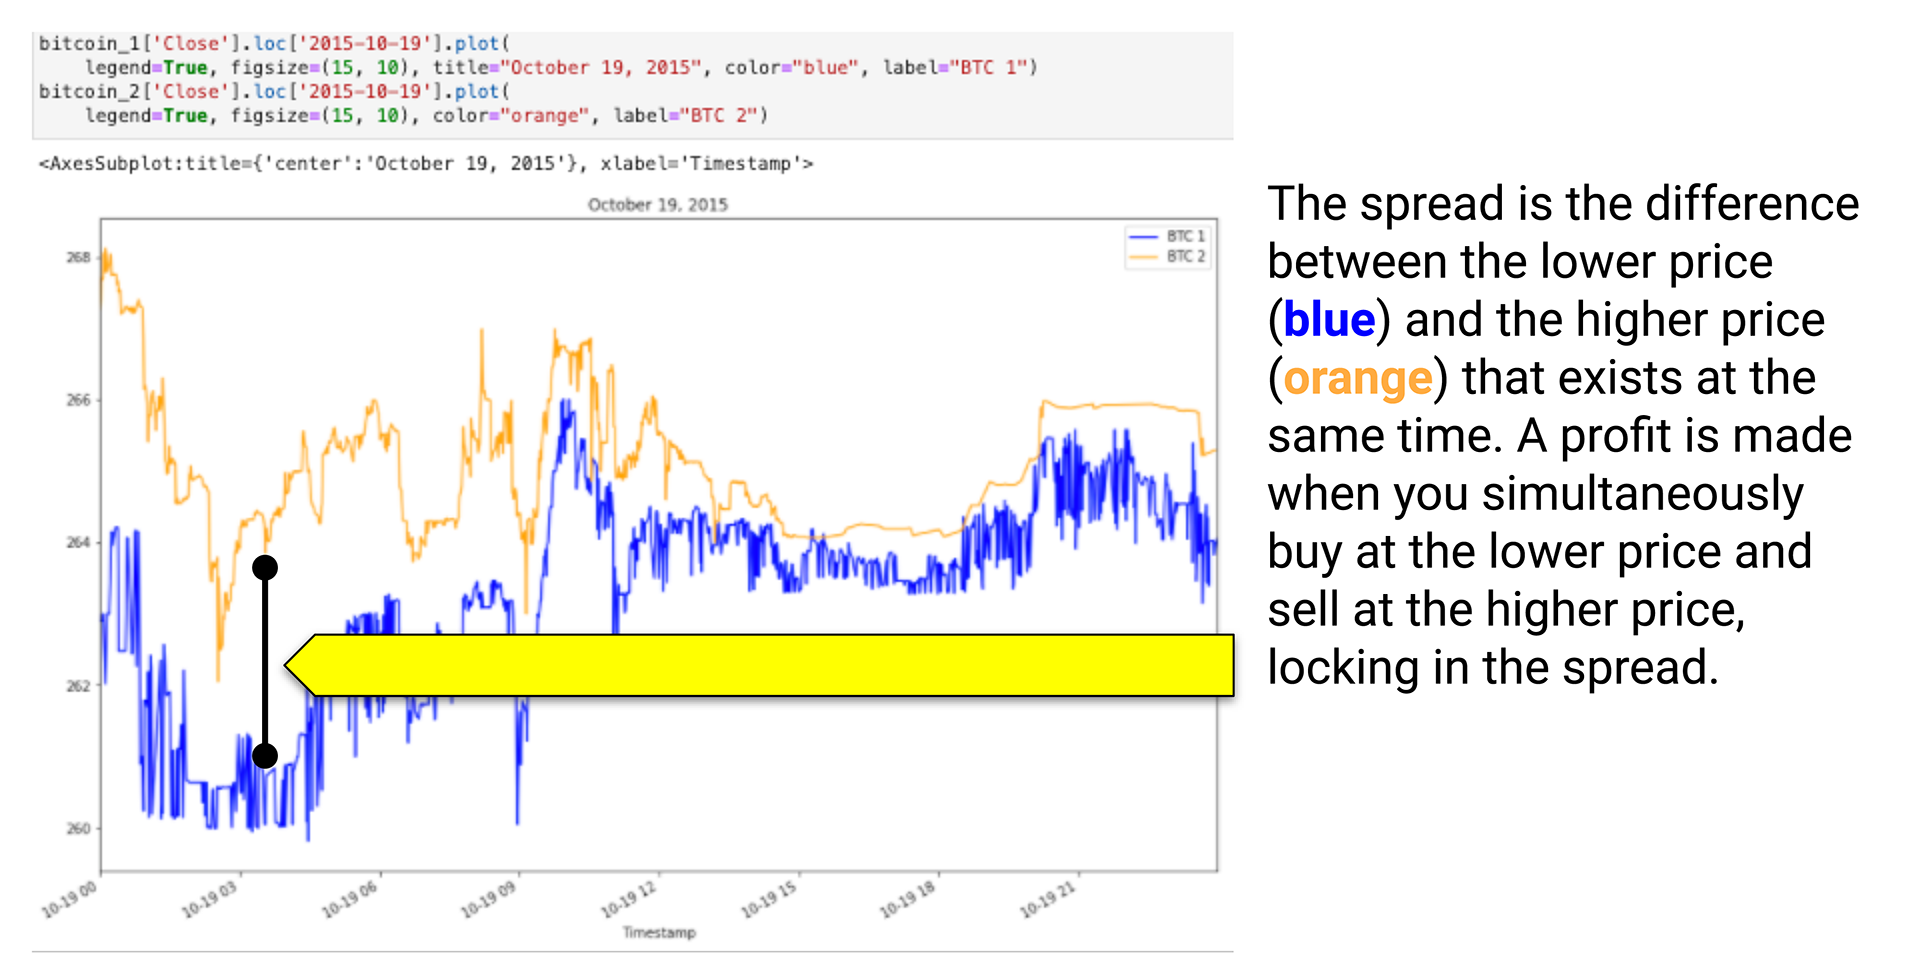

In [ ]:
arbitrage_spread = bitcoin_2['Close'].loc['2015-10-19'] - bitcoin_1['Close'].loc['2015-10-19']
arbitrage_spread.describe()

We’re using the Pandas describe function to evaluate the summary statistics for two similar data points in different datasets. Financial analysis is an iterative process of comparing information that you glean from the data. This demonstrates that you can incorporate the tools and functions that you’ve been using throughout this module into your analysis in many ways.

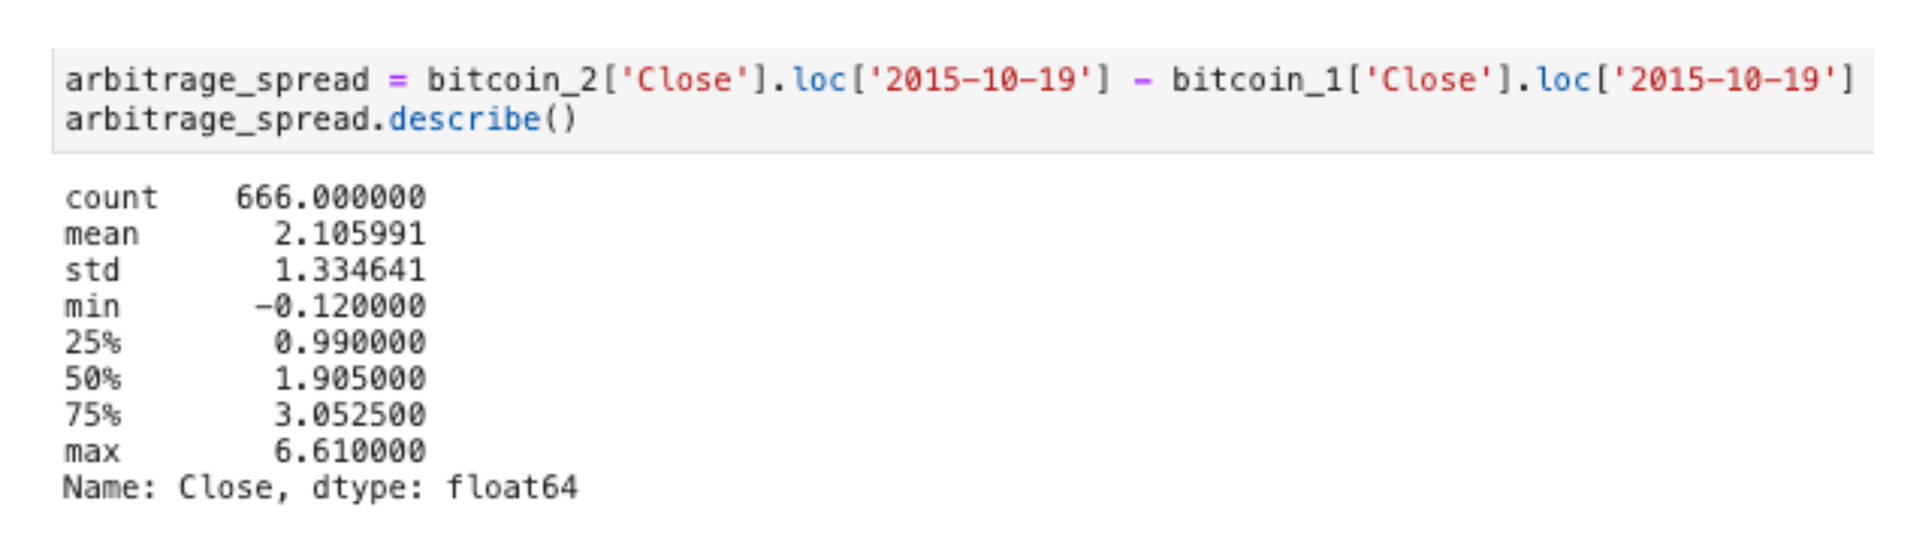

The key measurements are the total count, mean, and minimum and maximum values. Now, we know that 666 data points exist, that the average difference between the two prices is $2.10, and that the maximum difference is $6.61. The minimum value, -0.12, tells us that a time existed when bitcoin_1 had a higher price than bitcoin_2.

Because we know that at least one point exists when the price of bitcoin_1 exceeded that of bitcoin_2, it doesn’t make sense to calculate the potential profit for each data point in that range. Not all of them were profitable. When calculating possible profits, we also need to factor in the trading costs, like the trading and exchange fees. In the next section, we’ll figure out how to narrow down the trades to those that will prove profitable while taking into account the trading costs.

# Cover the Trading Costs
Two transaction fees exist for trading: one fee for buying and another one for selling. In this case, it costs 1% of the profit we make on each buy/sell transaction: 0.5% for buying and 0.5% for selling. Therefore, a trade doesn’t make sense if we’d make 1% profit or less.

To identify the trades that will cover the transaction costs, we first need to convert the arbitrage_spread dollar values into percentage return values. We can then more easily compare those values to the 1% minimum return threshold. We can do this with the help of conditional statements! Broken down, the code looks like this:

In [ ]:
# Use the arbitrage_spread to determine the return percentage of the trades with a positive spread
# Include only the trades that have an arbitrage_spread that’s greater than 0
# Use the bitcoin_1 prices from the day as the denominator

spread_return = arbitrage_spread[arbitrage_spread>0] / bitcoin_1['Close'].loc['2015-10-19']

# Create a profitable_trades DataFrame
# Show only those trades where the spread_return is greater than 1% (.01)
profitable_trades = spread_return[spread_return > .01]
profitable_trades.head(10)

# Print the summary statistics for the profitable_trades DataFrame
profitable_trades.describe()

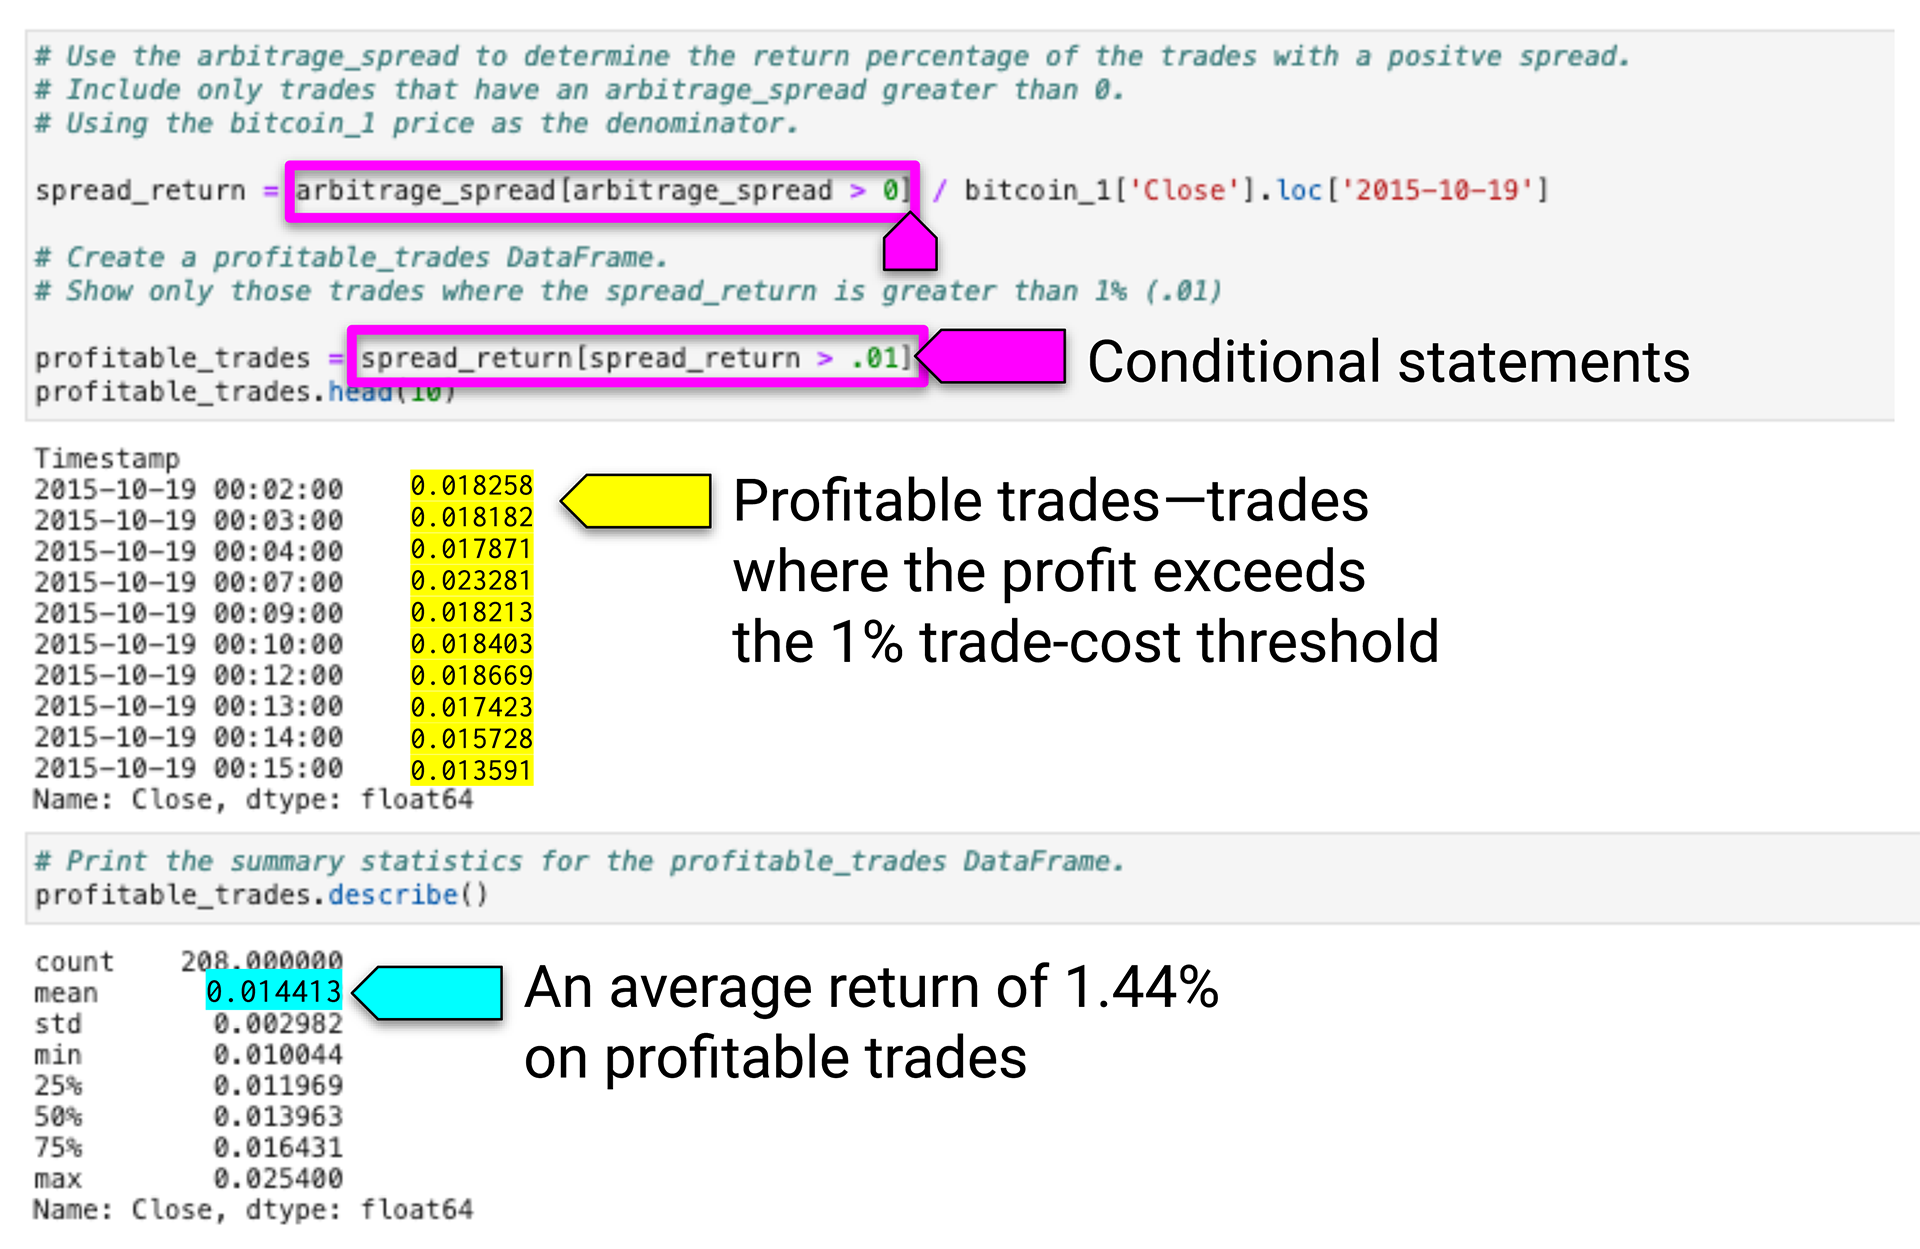

Now, the DataFrame shows only those returns that exceed the transaction cost threshold of 1%. The resulting summary statistics reveal that the total number of possible price points has decreased from 666 to 208 and that the average return (the mean value) is 1.44% Not great, but not horrible.

## Calculate in Dollars.

In [ ]:
profit = profitable_trades * bitcoin_1['Close'].loc['2015-10-19']
profit

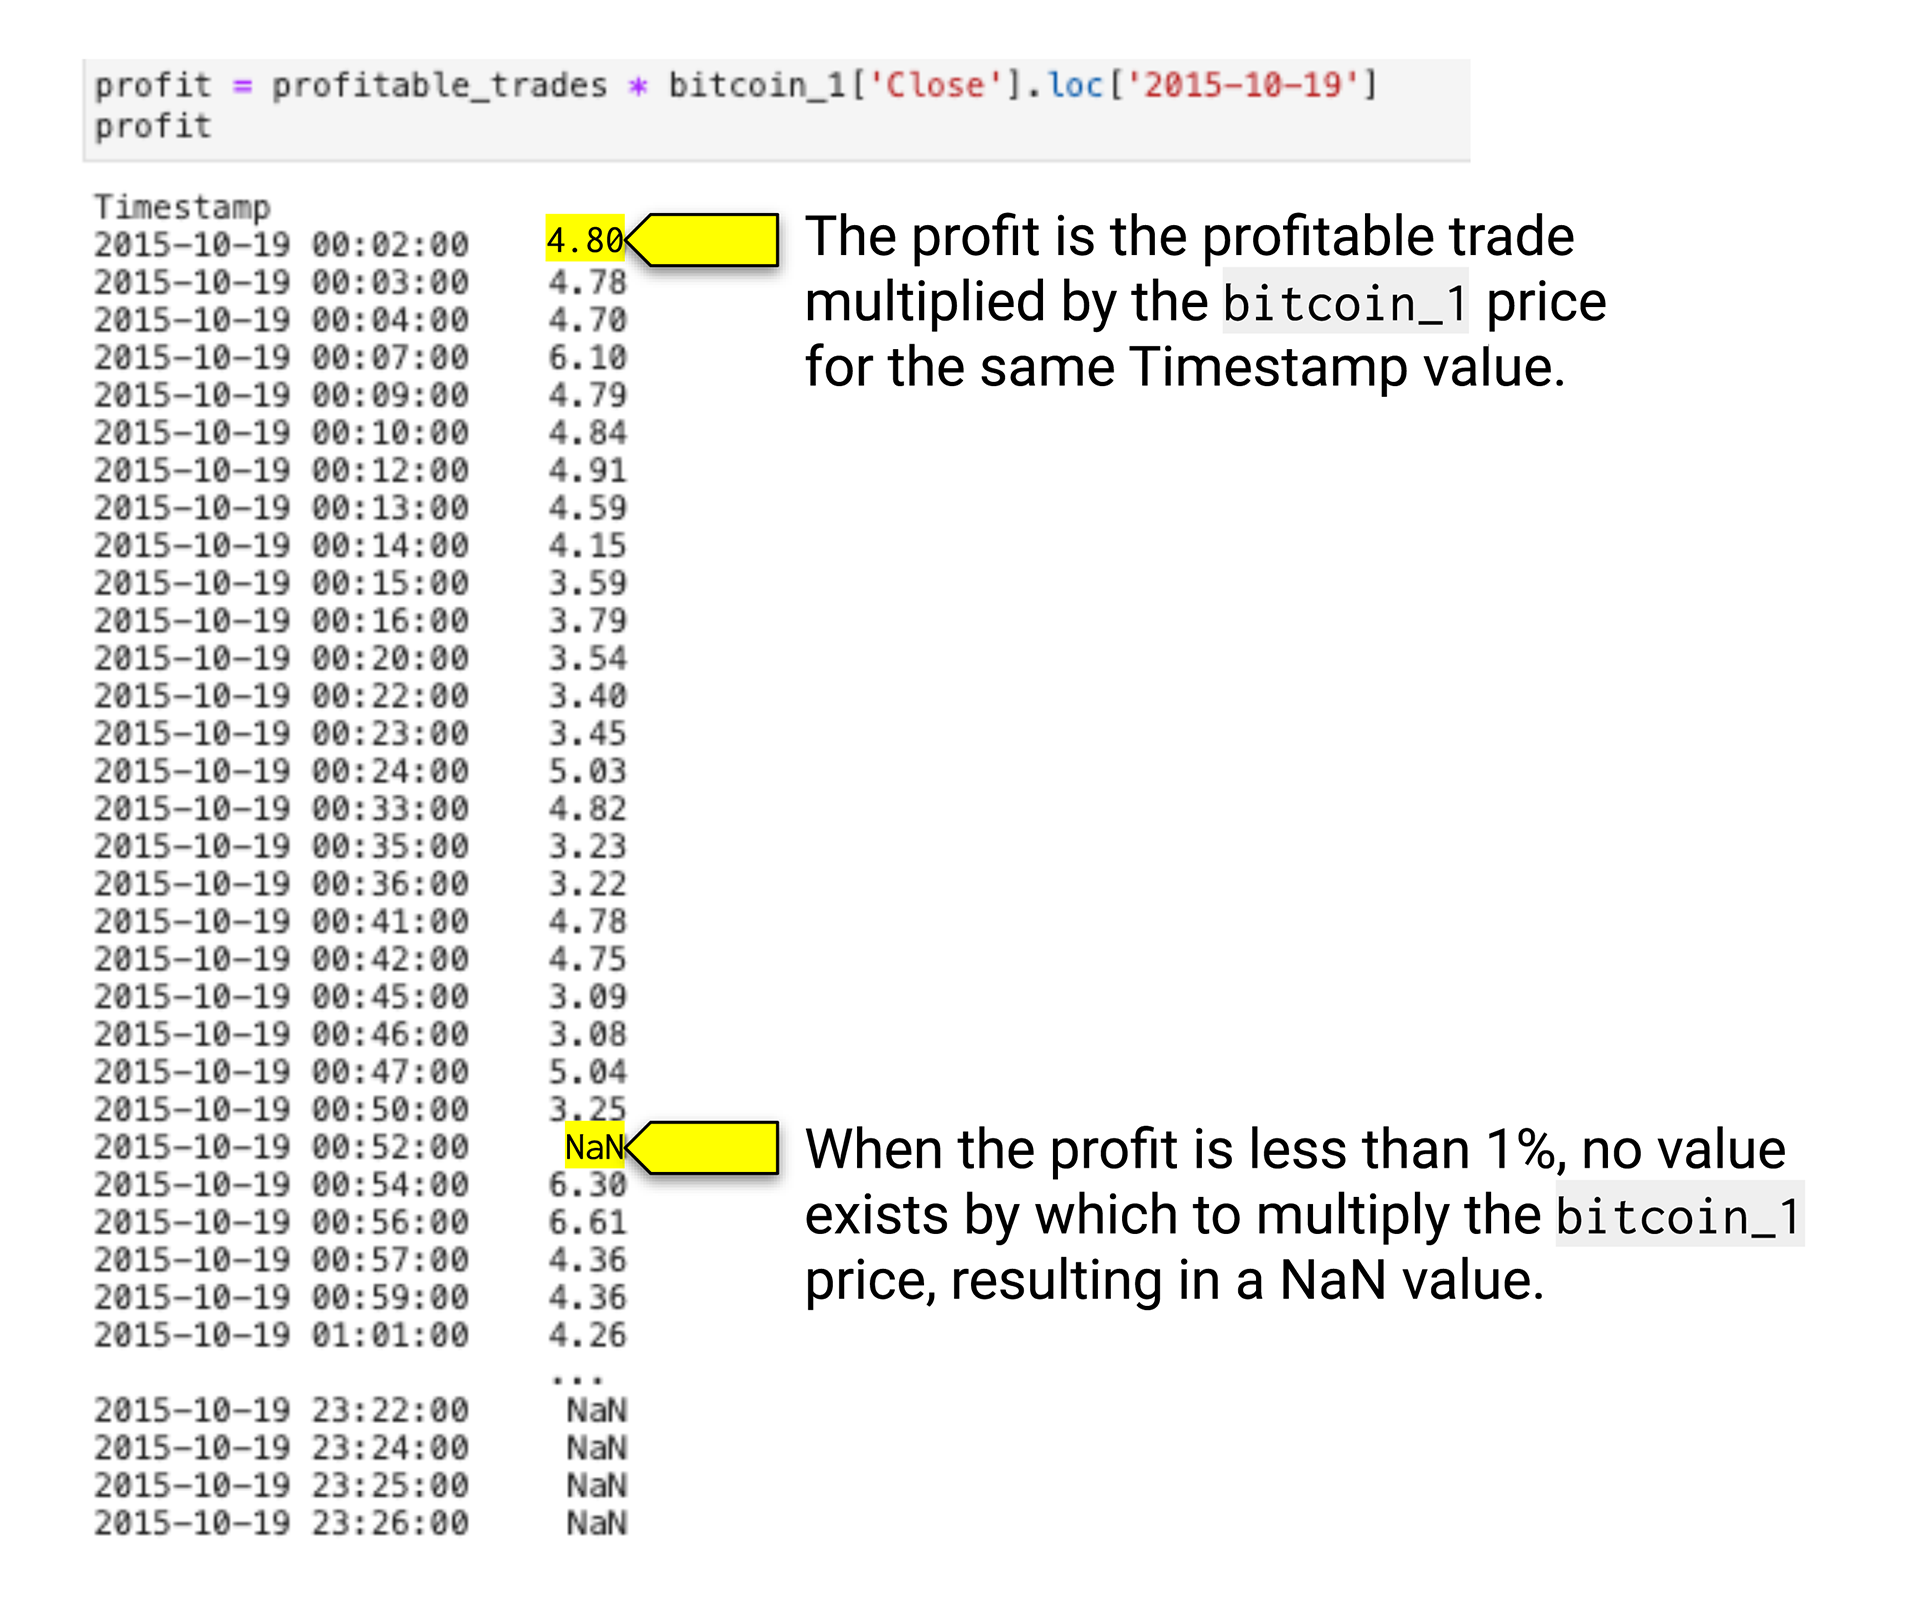

In [ ]:
profit_per_trade = profit.dropna()
profit_per_trade.describe()

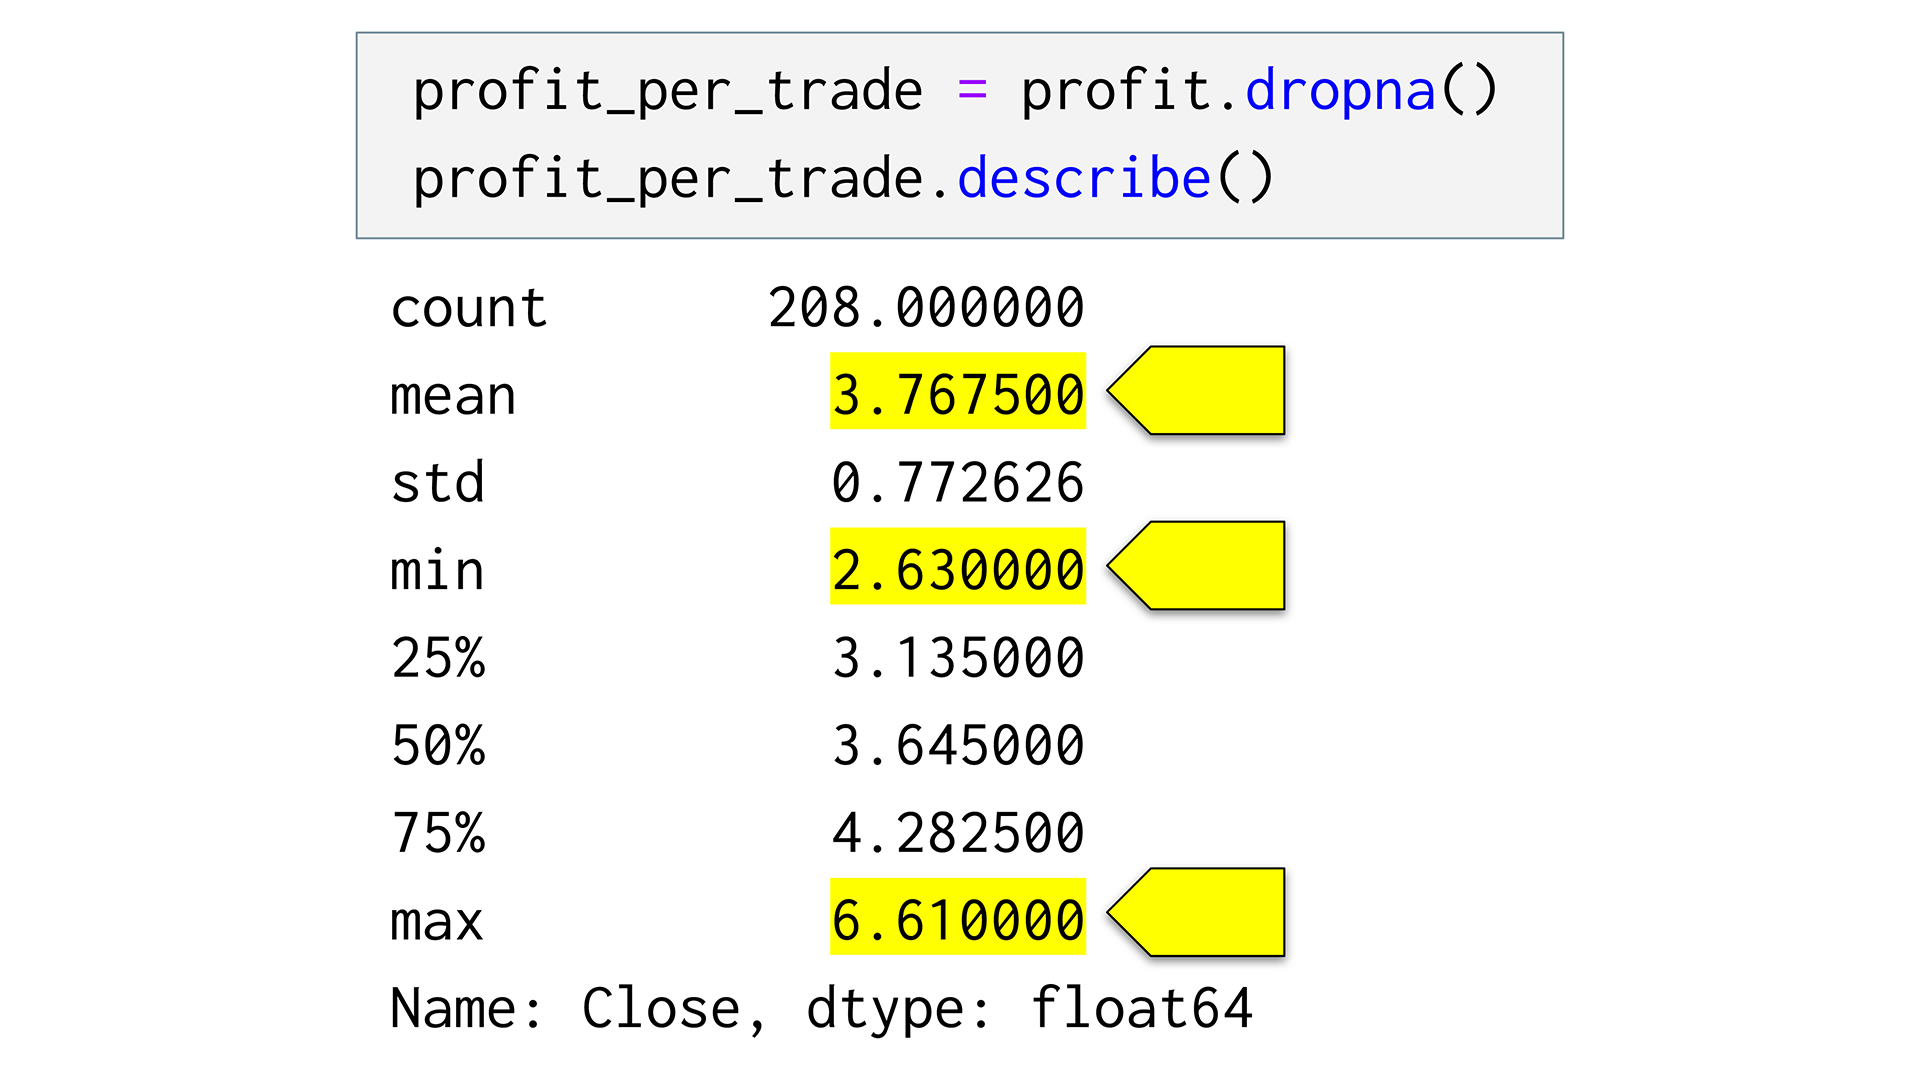

In [ ]:
profit_sum = profit_per_trade.sum()
profit_sum

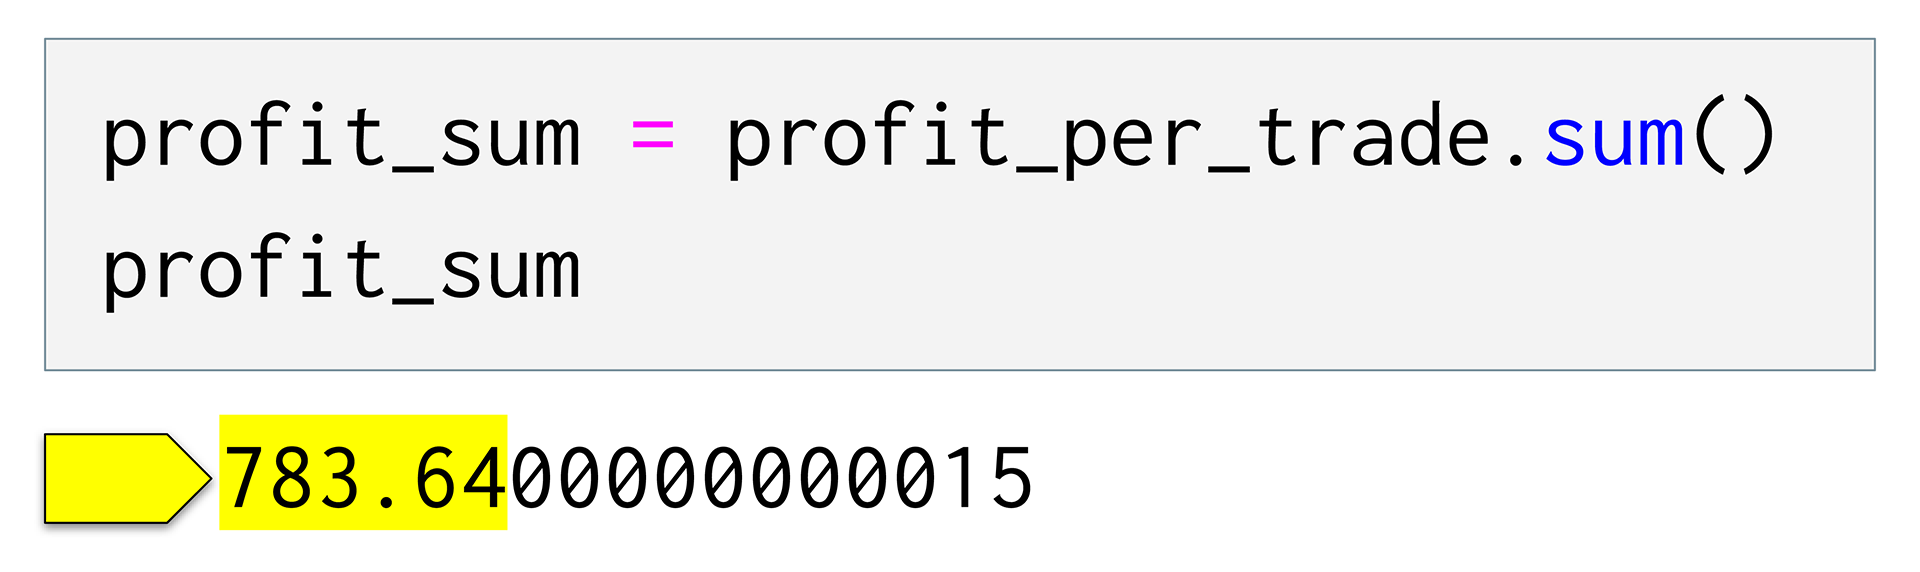

Using the day that you plotted in the “Month, Week, Day” activity, determine the total potential profit by calculating the profit, profit_per_trade, and profit_sum values.

# Plot the Profit
Now that we’ve calculated our profit, let’s plot it. Note the figsize and title parameters in the following code:

profit_per_trade.plot(figsize=(10, 7), title="Bitcoin Profits")

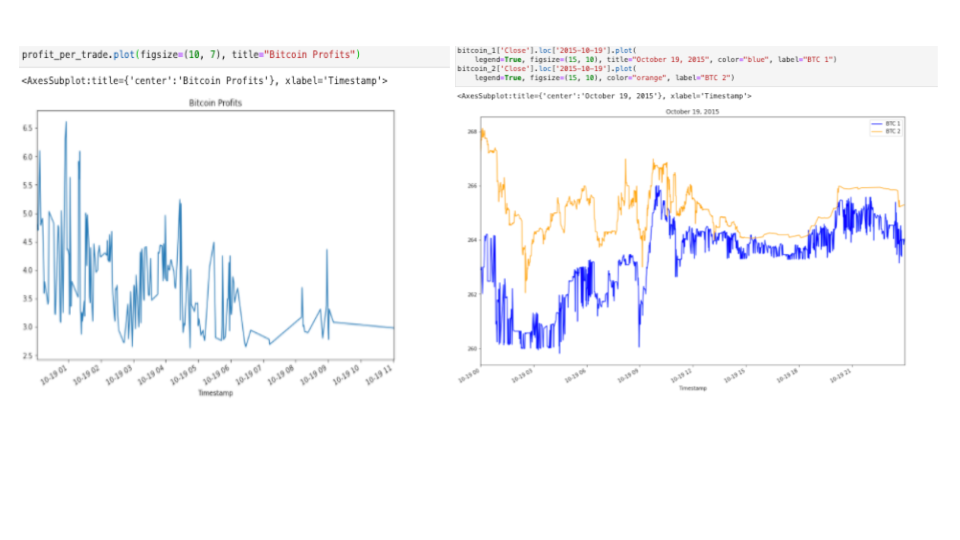

In [ ]:
cumulative_profit = profit_per_trade.cumsum()
cumulative_profit.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits")

# Last page of reading
https://courses.bootcampspot.com/courses/800/pages/3-dot-4-13-arbitrage-today?module_item_id=234985

# Some statistics 
## Hypothesis testing.
- https://youtu.be/2pHhjx9hyM4

- Ho Null Hypothesis
- Ha Alternative hypothesis.

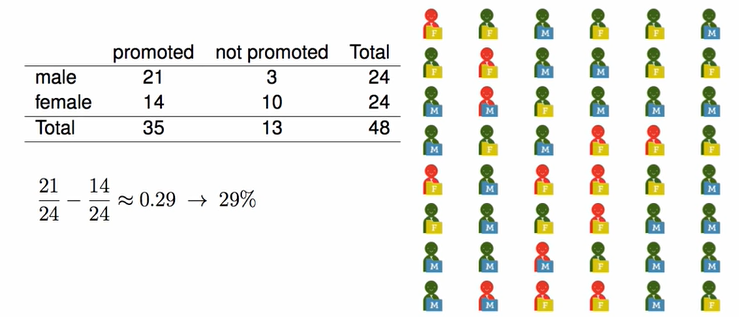


# watch this video about probability.

https://youtu.be/rG-SLQ2uF8U

# Mini-challenge.

- Get the sum, description 
- plot the values, remember to plot the values based on their type (numerical or categorical)
https://omar-hussein.medium.com/quick-fix-on-choosing-the-right-visualization-chart-944278f80011




In [4]:
# programming challenge.
import numpy as np
import pandas as pd
vect1 = np.zeros(15)
vect2 = np.ones(15)
df = pd.DataFrame({'col1':vect1,'col2':vect2})

In [7]:
df

col1  col2
0    0.0   1.0
1    0.0   1.0
2    0.0   1.0
3    0.0   1.0
4    0.0   1.0
5    0.0   1.0
6    0.0   1.0
7    0.0   1.0
8    0.0   1.0
9    0.0   1.0
10   0.0   1.0
11   0.0   1.0
12   0.0   1.0
13   0.0   1.0
14   0.0   1.0

## Find the highest two numbers in an array, create a function.



In [9]:
def get_highest_two_numbers():
    pass